# Business Understanding

The given project is to predict whether the claim of the vehicle insurance is Fraudulent or not,
using the given customer details.


In [1]:
#Importing Required Libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob


In [2]:
#Reading all train(csv) data and storing in a variable

Training_dataFiles = sorted(glob('Train*.csv'))
Training_dataFiles

['Train_Claim.csv',
 'Train_Demographics.csv',
 'Train_Policy.csv',
 'Train_Vehicle.csv',
 'Train_with_Target.csv']

In [3]:
#Merging all the training data

for id,file in enumerate(Training_dataFiles):
    if id==0:
        df=pd.read_csv(file)
    else:
        df=pd.merge(df,pd.read_csv(file))  

In [4]:
df

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleModel,VehicleYOM,VehicleMake,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,A5,2008,Audi,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,A5,2006,Audi,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,500/1000,617,1373.38,0,wife,Vehicle5152,Jetta,1999,Volkswagen,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,500/1000,722,1337.60,0,own-child,Vehicle37363,Jetta,2003,Volkswagen,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,100/300,500,1353.73,4279863,unmarried,Vehicle28633,CRV,2010,Toyota,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,...,500/1000,655,1276.01,0,unmarried,Vehicle13568,Impreza,2007,Suburu,N
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,...,100/300,1089,1273.38,0,unmarried,Vehicle19810,Wrangler,2003,Jeep,N
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,...,250/500,787,1380.92,3448735,own-child,Vehicle3339,Legacy,2004,Suburu,N
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,...,250/500,780,1389.29,3364301,not-in-family,Vehicle10240,Forrestor,2004,Suburu,N


# Data Preprocessing

In [5]:
#To Find Unique Value

colum_name =[]
unique_value=[]

for col in df:
    if df[col].dtype == 'object':
        
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table                                                                                           #from kaggle

,Col_name,Value
0,CustomerID,28836
22,VehicleID,28836
12,AmountOfTotalClaim,21976
18,DateOfPolicyCoverage,6779
8,IncidentAddress,1000
1,DateOfIncident,72
23,VehicleModel,39
16,InsuredHobbies,20
24,VehicleMake,15
15,InsuredOccupation,14


Missing Value Treatment

In [6]:
#Replacing with nan

nan = ['???','?','NA',-5,'MISSINGVALUE','MISSEDDATA',-1]

for na in nan:
    df = df.replace(na,np.nan)

In [7]:
#Checking null value count

df.isnull().sum()

CustomerID                        0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                     31
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               0
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                     

In [8]:
#converting the Witnesses data type to numerical

le = LabelEncoder()
df['Witnesses']= le.fit_transform(df['Witnesses'])

In [9]:
#converting the AmountOfTotalClaim data type to float

df['AmountOfTotalClaim'] = df['AmountOfTotalClaim'].astype(float)

In [10]:
#Replacing the nan values with median & mode

for col in df:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)


In [11]:
df.isnull().sum()

CustomerID                    0
DateOfIncident                0
TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
IncidentTime                  0
NumberOfVehicles              0
PropertyDamage                0
BodilyInjuries                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsuredAge                    0
InsuredZipCode                0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
CapitalGains                  0
CapitalLoss                   0
Country                       0
InsurancePolicyNumber         0
CustomerLoyaltyPeriod         0
DateOfPolicyCoverage          0
Insuranc

# Visualization

<AxesSubplot:xlabel='InsuredHobbies', ylabel='count'>

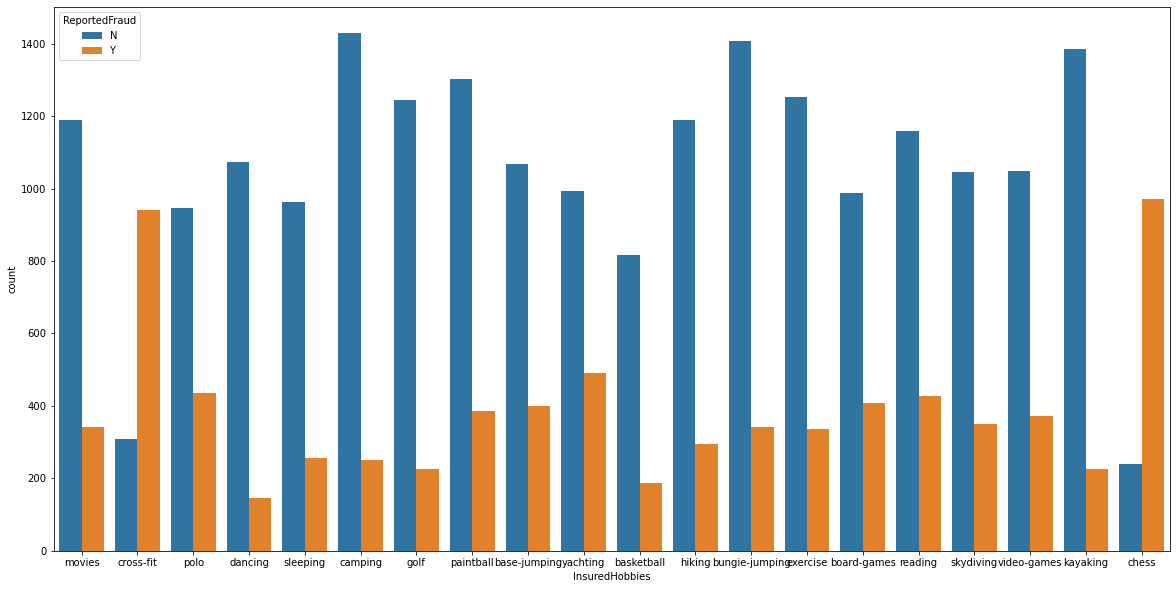

In [12]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='InsuredHobbies',hue='ReportedFraud',data=df)

<AxesSubplot:xlabel='SeverityOfIncident', ylabel='count'>

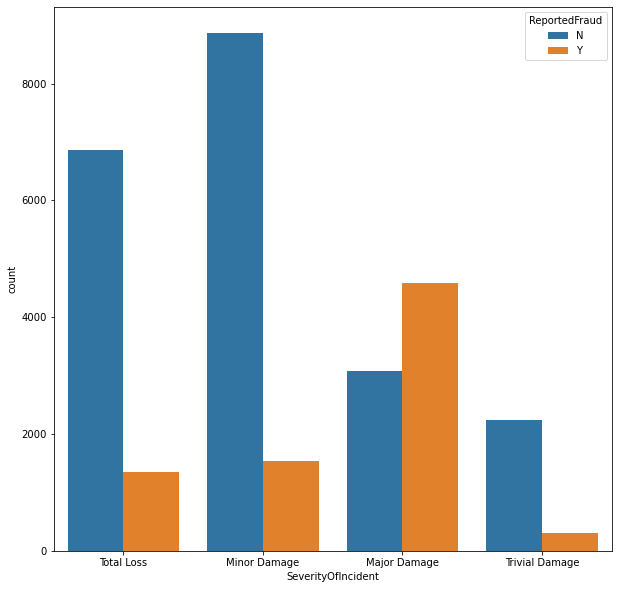

In [13]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='SeverityOfIncident',hue='ReportedFraud',data=df)

<AxesSubplot:xlabel='TypeOfIncident', ylabel='count'>

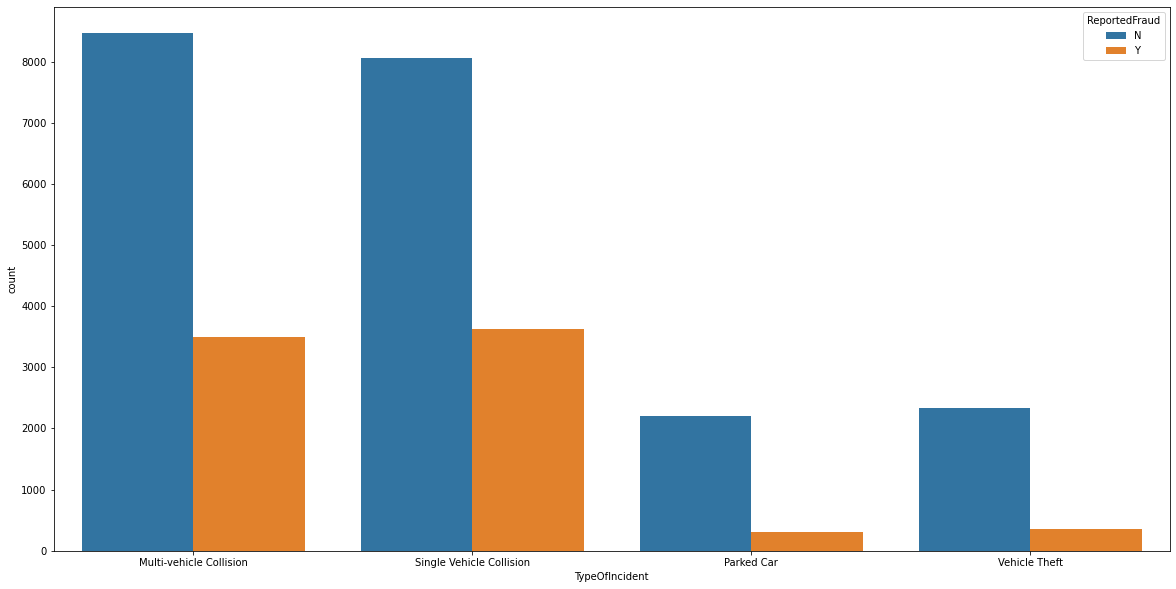

In [14]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='TypeOfIncident',hue='ReportedFraud',data=df)

<AxesSubplot:xlabel='NumberOfVehicles', ylabel='count'>

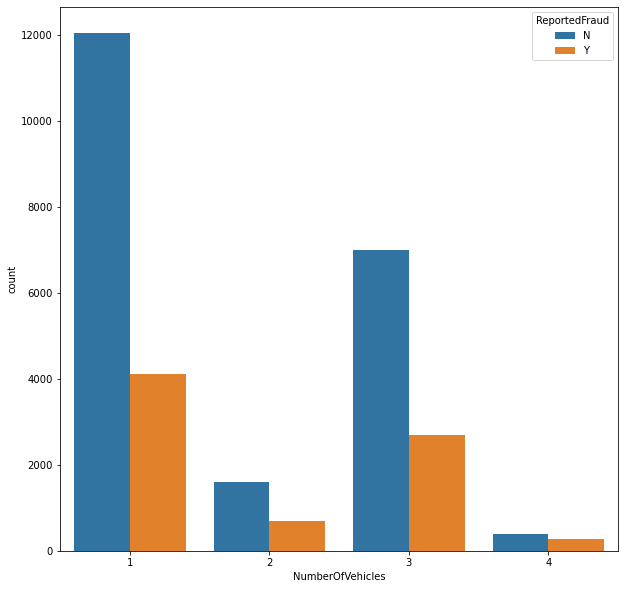

In [15]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='NumberOfVehicles',hue='ReportedFraud',data=df)

<AxesSubplot:xlabel='VehicleModel', ylabel='count'>

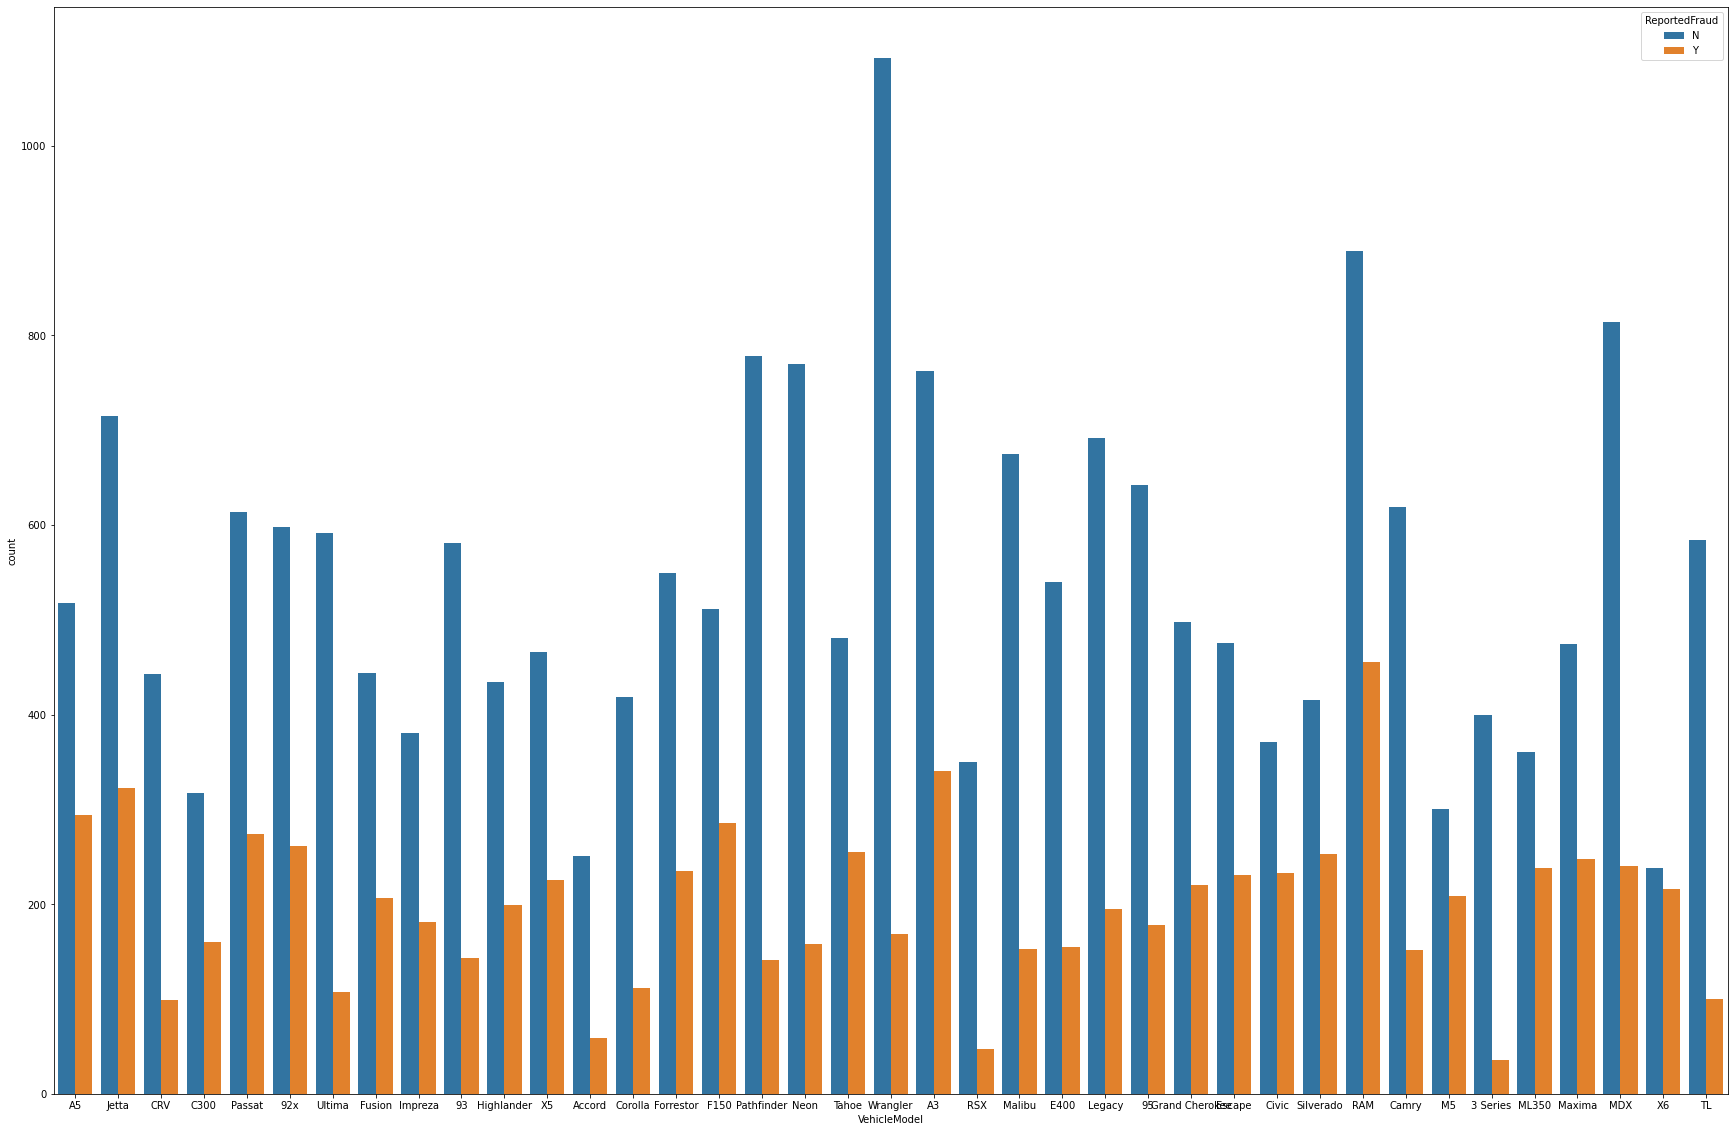

In [16]:
f, ax = plt.subplots(figsize=(30, 20))
sns.countplot(x='VehicleModel',hue='ReportedFraud',data=df)

<AxesSubplot:xlabel='InsurancePolicyState', ylabel='count'>

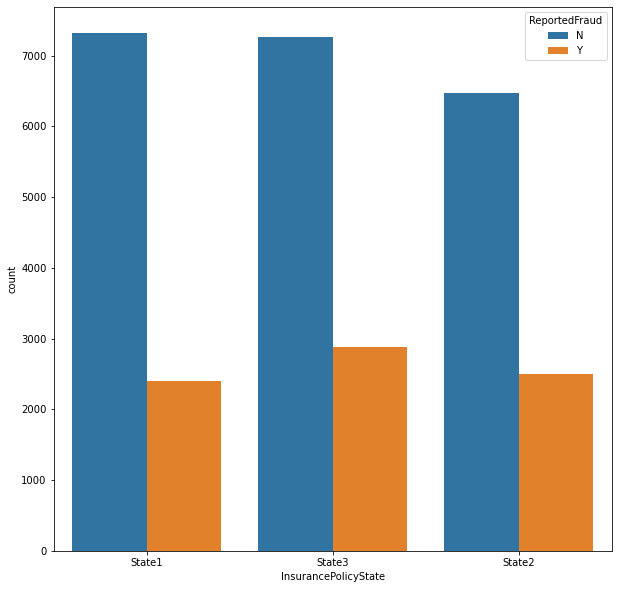

In [17]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='InsurancePolicyState',hue='ReportedFraud',data=df)

<AxesSubplot:>

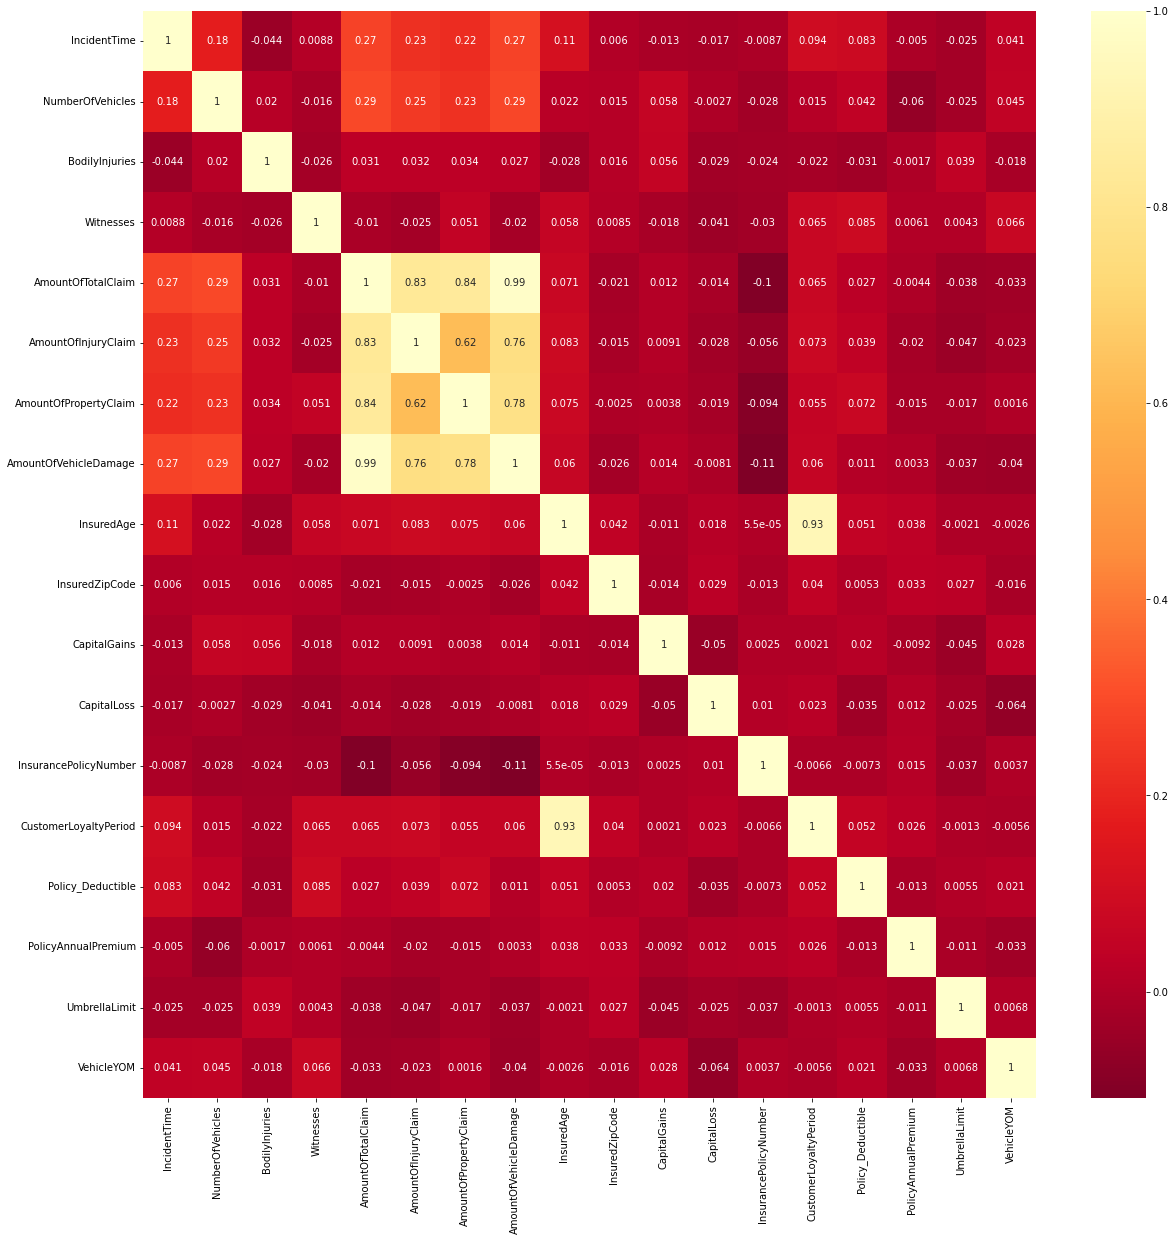

In [18]:
#To find correlation 

f, ax = plt.subplots(figsize=(20, 20))
cor = df.corr()
sns.heatmap(cor,annot = True,cmap = 'YlOrRd_r')

In [19]:
#dropping the column

df.drop(['CustomerID','VehicleID','InsurancePolicyNumber','CustomerLoyaltyPeriod','AmountOfInjuryClaim',
         'Country','InsurancePolicyState','PropertyDamage','PoliceReport','AmountOfPropertyClaim','AmountOfVehicleDamage',
        'IncidentTime','IncidentCity','VehicleYOM'],axis = 1, inplace = True)

In [20]:
df.dtypes

DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentAddress                object
NumberOfVehicles                int64
BodilyInjuries                  int64
Witnesses                       int32
AmountOfTotalClaim            float64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                     int64
DateOfPolicyCoverage           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
InsuredRelationship            object
VehicleModel                   object
VehicleMake 

# Converting Categorical into Numerical  

In [21]:
le = LabelEncoder()

for col in df:
    if df[col].dtype == 'object':
        df[col]= le.fit_transform(df[col])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DateOfIncident              28836 non-null  int32  
 1   TypeOfIncident              28836 non-null  int32  
 2   TypeOfCollission            28836 non-null  int32  
 3   SeverityOfIncident          28836 non-null  int32  
 4   AuthoritiesContacted        28836 non-null  int32  
 5   IncidentState               28836 non-null  int32  
 6   IncidentAddress             28836 non-null  int32  
 7   NumberOfVehicles            28836 non-null  int64  
 8   BodilyInjuries              28836 non-null  int64  
 9   Witnesses                   28836 non-null  int32  
 10  AmountOfTotalClaim          28836 non-null  float64
 11  InsuredAge                  28836 non-null  int64  
 12  InsuredZipCode              28836 non-null  int64  
 13  InsuredGender               288

# Creating Model

In [23]:
X = df.drop(['ReportedFraud'],axis = 1)

In [24]:
#checking the shape
X.shape

(28836, 27)

In [25]:
Y = df['ReportedFraud']  

In [26]:
#feature Scaling

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
xtrain = scale.fit_transform(X)

In [27]:
#Training using AdaboostClassifier

from sklearn.ensemble import AdaBoostClassifier
aclf = AdaBoostClassifier()
aclf.fit(xtrain,Y)

AdaBoostClassifier()

In [28]:
#Training using RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators":[50,100,200],
    "max_depth":[2,8,32,None],
    "min_samples_split":[2,4,6]
    
}
np.random.seed(42)
clf = RandomForestClassifier()
rs_clf = RandomizedSearchCV(estimator=clf,
param_distributions = grid,
cv = 5,
verbose = 2)
rs_clf.fit(xtrain, Y);



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, min_samples_split=6, n_estimators=200; total time=   8.6s
[CV] END max_depth=None, min_samples_split=6, n_estimators=200; total time=   8.8s
[CV] END max_depth=None, min_samples_split=6, n_estimators=200; total time=   8.8s
[CV] END max_depth=None, min_samples_split=6, n_estimators=200; total time=   8.9s
[CV] END max_depth=None, min_samples_split=6, n_estimators=200; total time=   8.8s
[CV] END .max_depth=8, min_samples_split=4, n_estimators=100; total time=   2.5s
[CV] END .max_depth=8, min_samples_split=4, n_estimators=100; total time=   2.4s
[CV] END .max_depth=8, min_samples_split=4, n_estimators=100; total time=   2.3s
[CV] END .max_depth=8, min_samples_split=4, n_estimators=100; total time=   2.4s
[CV] END .max_depth=8, min_samples_split=4, n_estimators=100; total time=   2.3s
[CV] END max_depth=32, min_samples_split=6, n_estimators=200; total time=   8.8s
[CV] END max_depth=32, min_samples_spl

In [29]:
#To give best Parameter

rs_clf.best_params_

{'n_estimators': 200, 'min_samples_split': 6, 'max_depth': 32}

In [30]:
#Reading Test Data

test_data = pd.read_csv('FraudReport.csv') 

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  8912 non-null   int64  
 1   DateOfIncident              8912 non-null   int64  
 2   TypeOfIncident              8912 non-null   int64  
 3   TypeOfCollission            8912 non-null   int64  
 4   SeverityOfIncident          8912 non-null   int64  
 5   AuthoritiesContacted        8912 non-null   int64  
 6   IncidentState               8912 non-null   int64  
 7   IncidentAddress             8912 non-null   int64  
 8   NumberOfVehicles            8912 non-null   int64  
 9   BodilyInjuries              8912 non-null   int64  
 10  Witnesses                   8912 non-null   int64  
 11  AmountOfTotalClaim          8912 non-null   float64
 12  InsuredAge                  8912 non-null   int64  
 13  InsuredZipCode              8912 

In [32]:
#checking the shape
test_data.shape

(8912, 28)

In [33]:
x_test = test_data.drop(['CustomerID'],axis = 1)


In [34]:
#feature Scaling

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
xtest = scale.fit_transform(x_test)

In [35]:
#predicting using Adaboost classifier

Y_pred_aclf = aclf.predict(xtest)

In [37]:
#Total count of 0 & 1
bc_a = np.bincount(Y_pred_aclf)
bc_a

array([7588, 1324], dtype=int64)

In [38]:
#predicting using Random forest Classifier

Y_pred_rfc = rs_clf.predict(xtest)

In [41]:
#Total count of 0 & 1
bc_r = np.bincount(Y_pred_rfc)
bc_r

array([7596, 1316], dtype=int64)

In [42]:
cus_id = test_data['CustomerID']

In [46]:
#Fitting the predicted from Adaboost to convert it into csv 
df_main = pd.DataFrame({'CustomerID':cus_id,'ReportedFraud':Y_pred_aclf})

In [45]:
#Fitting the predicted from RandomForest to convert it into csv
df_main_ = pd.DataFrame({'CustomerID':cus_id,'ReportedFraud':Y_pred_rfc})

In [47]:
#df_main.to_csv('Train.csv', index = False)

# Conclusion

The model is created using Random forest Algorithm with an f1 score of 0.78.